<a href="https://colab.research.google.com/github/spros1/Methods-and-Algorithms_Work_Semester_21-22/blob/main/AssortmentPlanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximize the profit of promoted products to a specific target of people

We are going to work with two datasets of products :<br>

|Dataset1 |Dataset2|
|---------|--------|
|   17x7  | 20x10  |

In [ ]:
## Upload files - Run the same cell twice to upload both 17x7.txt and 20x10.txt files
import pandas as pd
import io

from google.colab import files
uploaded = files.upload()

### First create two lists one for each file in order to create the names of columns incrementally 

The columns names will be :
* ID for product id
* PC for percentage that bought the product
* PCD for percetage that bought only this product
* AVG for average contribution of product to total revenue
* AVGREVENUE for average revenue of all products of the line

In [231]:
columns1 = []
for i in range(0,7):
    s = "id"+str(i+1)
    columns1.append(s)
    s = "pc"+str(i+1)
    columns1.append(s)
    s = "pcd"+str(i+1)
    columns1.append(s)
    s = "avg"+str(i+1)
    columns1.append(s)
columns1.append("avgrevenue")

columns2 = []
for i in range(0,10):
    s = "id"+str(i+1)
    columns2.append(s)
    s = "pc"+str(i+1)
    columns2.append(s)
    s = "pcd"+str(i+1)
    columns2.append(s)
    s = "avg"+str(i+1)
    columns2.append(s)
columns2.append("avgrevenue")

Create the dataframes 

In [232]:
df_17x7= pd.read_csv("17x7.txt", header=None, sep = ' ', names = columns1)

In [233]:
df_20x10= pd.read_csv("20x10.txt", header=None, sep = ' ', names = columns2)

# Check values for both files
First for 17x7.txt

In [234]:
df_17x7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id1         7842 non-null   int64  
 1   pc1         7842 non-null   float64
 2   pcd1        7842 non-null   float64
 3   avg1        7842 non-null   float64
 4   id2         7842 non-null   int64  
 5   pc2         7842 non-null   float64
 6   pcd2        7842 non-null   float64
 7   avg2        7842 non-null   float64
 8   id3         7842 non-null   int64  
 9   pc3         7842 non-null   float64
 10  pcd3        7842 non-null   float64
 11  avg3        7842 non-null   float64
 12  id4         7842 non-null   int64  
 13  pc4         7842 non-null   float64
 14  pcd4        7842 non-null   float64
 15  avg4        7842 non-null   float64
 16  id5         7842 non-null   int64  
 17  pc5         7842 non-null   float64
 18  pcd5        7842 non-null   float64
 19  avg5        7842 non-null  

In [235]:
df_20x10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id1         18940 non-null  int64  
 1   pc1         18940 non-null  float64
 2   pcd1        18940 non-null  float64
 3   avg1        18940 non-null  float64
 4   id2         18940 non-null  int64  
 5   pc2         18940 non-null  float64
 6   pcd2        18940 non-null  float64
 7   avg2        18940 non-null  float64
 8   id3         18940 non-null  int64  
 9   pc3         18940 non-null  float64
 10  pcd3        18940 non-null  float64
 11  avg3        18940 non-null  float64
 12  id4         18940 non-null  int64  
 13  pc4         18940 non-null  float64
 14  pcd4        18940 non-null  float64
 15  avg4        18940 non-null  float64
 16  id5         18940 non-null  int64  
 17  pc5         18940 non-null  float64
 18  pcd5        18940 non-null  float64
 19  avg5        18940 non-nul

Perform a per line loop , in order to fill two lists.
We start at position 0 where exist the product id 
and we skip 3 columns for the next product. When exists we translate that at value 1 else 0. At last position exists the contribution of this combination of products <br><br>
For example you can find below how a record will change(this is for 17x7 but it is the same for 20x10):  
0 84.00 0.00 20.43 2 37.33 0.00 3.32 3 62.67 0.00 11.12 4 17.33 0.00 0.64 7 100.00 16.00 42.99 10 70.67 0.00 14.69 14 52.00 0.00 6.81 425.8133 will change to : <br>

**products** : 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0

**contribution** <br>
425.8133


#Create datasets for exercise 2a

### First create the two tuples for 17x7

In [430]:
# create two tuples and one temp list to hold the existence of products and their appearance to the line
df_17x7list  = (7,17)

df_17x7products = []
df_17x7contribution = []

In [431]:
# perform the loop
for e in range(0,df_17x7.shape[0]):
    lst = []
    lst0 = []
    for i in range(0,df_17x7list[0]):
        lst0.append(df_17x7.iloc[e,i*4]) # every for positions exists the product starting from 0
    for i in range(0,df_17x7list[1]):
        if i in lst0:
            lst.append(1)
        else:
            lst.append(0)
    df_17x7contribution.append(df_17x7.iloc[e,28]) # 28 position exists revenue for combination
    df_17x7products.append(lst)

In [432]:
print(len(df_17x7contribution))
print(len(df_17x7products))

7842
7842


In [433]:
df_17x7products

[[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
 [1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 0,

In [240]:
df_17x7contribution

[425.8133,
 409.84,
 365.1733,
 380.32,
 298.6933,
 434.2667,
 401.5733,
 442.64,
 414.5067,
 359.44,
 404.9867,
 318.64,
 388.24,
 347.9467,
 432.72,
 384.1067,
 445.8133,
 361.52,
 410.8533,
 395.04,
 506.24,
 441.7333,
 354.88,
 388.9333,
 378.2667,
 385.2,
 472.5867,
 434.9333,
 431.6267,
 266.5333,
 433.9467,
 357.92,
 421.7067,
 429.9733,
 467.4667,
 529.12,
 424.2933,
 358.4533,
 363.7333,
 327.3067,
 420.0267,
 451.7867,
 294.5867,
 443.1733,
 435.2267,
 393.5467,
 439.2267,
 427.36,
 389.28,
 425.0133,
 338.6667,
 412.48,
 391.84,
 415.6267,
 346.1067,
 340.7467,
 399.36,
 434.32,
 404.2133,
 445.44,
 416.3467,
 409.44,
 426.5867,
 457.7867,
 437.6,
 440.8533,
 412.9867,
 420.8267,
 379.9467,
 440.6133,
 447.36,
 438.7733,
 380.0533,
 315.1467,
 385.1467,
 487.7067,
 435.0133,
 407.2,
 425.76,
 420.6133,
 369.3333,
 445.0933,
 383.84,
 447.4933,
 436.4,
 360.4533,
 386.5333,
 383.92,
 416.9867,
 417.6533,
 468.64,
 432.6667,
 442.16,
 478.9333,
 315.8133,
 429.7333,
 444.5067,

### Second create the two tuples for 20x10

In [434]:
# create two tuples and two temp lists to hold the existence of products and their appearance to the line
df_20x10list = (10,20)

df_20x10products = []
df_20x10contribution = []

In [435]:
# perform the loop
for e in range(0,df_20x10.shape[0]):
    lst = []
    lst0 = []
    for i in range(0,df_20x10list[0]):
        lst0.append(df_20x10.iloc[e,i*4]) # every for positions exists the product starting from 0
    for i in range(0,df_20x10list[1]):
        if i in lst0:
            lst.append(1)
        else:
            lst.append(0)
    df_20x10contribution.append(df_20x10.iloc[e,40]) # 40 position exists revenue for combination
    df_20x10products.append(lst)

In [436]:
print(len(df_20x10contribution))
print(len(df_20x10products))

18940
18940


In [ ]:
df_20x10products

In [ ]:
df_20x10contribution

#Create functions for the models, for the visualization and the comparison of results

In [563]:
# import for models and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

from time                    import time
import xgboost as xgb
from xgboost                 import XGBClassifier
from xgboost                 import XGBRegressor
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestRegressor
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import LinearRegression
from imblearn.pipeline       import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [440]:
# function to run method
def model_execution(model, model_name):
  
  pipe  = Pipeline(steps= [ (model_name, model)])
  start = time()
  fitted_model = pipe.fit(X_train, y_train)
  end = time()
  runtime = round((end - start),4)
  print(f"{model_name} took {runtime} seconds or {round((runtime/60),4)} minutes to run.")
 
  return fitted_model, runtime

In [441]:
# function to fit the model
def model_prediction(fitted_model, x_feat):
  
  pred = fitted_model.predict(x_feat)
  return pred

In [442]:
# function for the scores of regression
def model_evaluation_regressor (y_true, y_pred, model_name, train_test):

  df_score=pd.DataFrame({ 
                   'model_name'  : [model_name, model_name, model_name]
                  , 'type'       : [train_test, train_test, train_test]
                  ,'metric_name' : ['Mean_Squared_Error', 'R2 Score','Root mean squared error'] 
                  , 'metric'     : [
                                    round(mean_squared_error(y_true     , y_pred)     , 4)
                                  , round(r2_score(y_true               , y_pred)     , 4)
                                  , round(sqrt(mean_squared_error(y_true, y_pred))    , 4)
                                
                                  ]
  })
  display(df_score)
  return df_score

#### Functions for clasiffication ( fo exercise 2b )

In [443]:
## We are going to create a function using LabelBinarizer() in order to evaluate the AUC ROC score for multi-class problem:
def multiclass_roc_auc_score(y_true, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_true)
  y_true = lb.transform(y_true)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_true, y_pred, average=average)

In [444]:
## Same for precision score
def multiclass_precision_score(y_true, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_true)
  y_true = lb.transform(y_true)
  y_pred = lb.transform(y_pred)
  return precision_score(y_true, y_pred, average=average)

In [574]:
# function for the scores 
def model_evaluation_classification (y_true, y_pred, model_name, train_test):

  df_score=pd.DataFrame({ 
                   'model_name' : [
                                     model_name
                                   , model_name
                                   , model_name
                                   , model_name
                                   , model_name
                                  ],
                   'type'       : [
                                     train_test
                                   , train_test
                                   , train_test
                                   , train_test
                                   , train_test
                                  ],
                   'metric_name': [
                                    'Accuracy_Score' 
                                    ,'F1_Score'      
                                    ,'Recall'        
                                    ,'Precision'      
                                    ,'Roc_Auc_Score'
                                  ],
                   'metric'     : [
                                    round(accuracy_score(y_true, y_pred       )   , 4)
                                   ,round(f1_score(y_true, y_pred             )   , 4)
                                   ,round(recall_score(y_true, y_pred         )   , 4)
                                   ,round(precision_score(y_true, y_pred      )   , 4)
                                   ,round(roc_auc_score(y_true, y_pred        )   , 4)

                                  ]
  })
  display(df_score)
  return df_score

In [600]:
def conf_matrix_classification (y_true, y_pred, incmap):

  # show values
  matrix = confusion_matrix(y_true,  y_pred, labels=[0,1,2], normalize="true")
  print('Confusion matrix : \n',matrix)

  # plot
  sns.set()
  ax = sns.heatmap(matrix, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap= incmap)
  plt.show()

#First run methods and fit them for 17x7 dataset

### Split to tran and test 80 - 20 %

In [448]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(df_17x7products, df_17x7contribution, test_size=0.2, random_state=42)

###Random Forest

In [449]:
#  Random Forest model run
RFC_model, RFC_runtime = model_execution(RandomForestRegressor(), 'RandomForest')
train_pred_RFC = model_prediction(RFC_model, X_train  )
test_pred_RFC  = model_prediction(RFC_model, X_test)

# Random Forest Evaluation
print("\n")
RFC_train = model_evaluation_regressor(y_train, train_pred_RFC, 'RFC', 'Train17x10')
print("-----------------------------------------------\n")
RFC_test = model_evaluation_regressor(y_test, test_pred_RFC,'RFC', 'Test17x10')

RandomForest took 1.3565 seconds or 0.0226 minutes to run.




,model_name,type,metric_name,metric
0,RFC,Train17x10,Mean_Squared_Error,67.3079
1,RFC,Train17x10,R2 Score,0.9679
2,RFC,Train17x10,Root mean squared error,8.2041


-----------------------------------------------



,model_name,type,metric_name,metric
0,RFC,Test17x10,Mean_Squared_Error,480.3790
1,RFC,Test17x10,R2 Score,0.7690
2,RFC,Test17x10,Root mean squared error,21.9175


###LinearRegression

In [450]:
# LinearRegression run 
LRG_model, LRG_runtime = model_execution(LinearRegression(), 'LRGClassifier')
train_pred_LRG = model_prediction(LRG_model, X_train)
test_pred_LRG  = model_prediction(LRG_model, X_test)

# LinearRegression Evaluation
print("\n")
LRG_train = model_evaluation_regressor(y_train, train_pred_LRG, 'LRG', 'Train17x10')
print("-----------------------------------------------\n")
LRG_test = model_evaluation_regressor(y_test, test_pred_LRG,'LRG', 'Test17x10')

LRGClassifier took 0.0281 seconds or 0.0005 minutes to run.




,model_name,type,metric_name,metric
0,LRG,Train17x10,Mean_Squared_Error,407.9871
1,LRG,Train17x10,R2 Score,0.8054
2,LRG,Train17x10,Root mean squared error,20.1987


-----------------------------------------------



,model_name,type,metric_name,metric
0,LRG,Test17x10,Mean_Squared_Error,418.9419
1,LRG,Test17x10,R2 Score,0.7985
2,LRG,Test17x10,Root mean squared error,20.4681


#Second run methods and fit them for 20x10 dataset

In [451]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(df_20x10products, df_20x10contribution, test_size=0.2, random_state=42)

###Random Forest

In [452]:
#  Random Forest model run
RFC_model, RFC_runtime = model_execution(RandomForestRegressor(), 'RandomForest')
train_pred_RFC = model_prediction(RFC_model, X_train  )
test_pred_RFC  = model_prediction(RFC_model, X_test)

# Random Forest Evaluation
print("\n")
RFC_train = model_evaluation_regressor(y_train, train_pred_RFC, 'RFC', 'Train_20x10')
print("-----------------------------------------------\n")
RFC_test = model_evaluation_regressor(y_test, test_pred_RFC,'RFC', 'Test20x10')

RandomForest took 3.9142 seconds or 0.0652 minutes to run.




,model_name,type,metric_name,metric
0,RFC,Train_20x10,Mean_Squared_Error,1671.0568
1,RFC,Train_20x10,R2 Score,0.9508
2,RFC,Train_20x10,Root mean squared error,40.8786


-----------------------------------------------



,model_name,type,metric_name,metric
0,RFC,Test20x10,Mean_Squared_Error,12009.4147
1,RFC,Test20x10,R2 Score,0.6563
2,RFC,Test20x10,Root mean squared error,109.5875


In [453]:
# LinearRegression run 
LRG_model, LRG_runtime = model_execution(LinearRegression(), 'LRGClassifier')
train_pred_LRG = model_prediction(LRG_model, X_train)
test_pred_LRG  = model_prediction(LRG_model, X_test)

# LinearRegression Evaluation
print("\n")
LRG_train = model_evaluation_regressor(y_train, train_pred_LRG, 'LRG', 'Train_20x10')
print("-----------------------------------------------\n")
LRG_test = model_evaluation_regressor(y_test, test_pred_LRG,'LRG', 'Test20x10')

LRGClassifier took 0.0575 seconds or 0.001 minutes to run.




,model_name,type,metric_name,metric
0,LRG,Train_20x10,Mean_Squared_Error,9933.8745
1,LRG,Train_20x10,R2 Score,0.7073
2,LRG,Train_20x10,Root mean squared error,99.6688


-----------------------------------------------



,model_name,type,metric_name,metric
0,LRG,Test20x10,Mean_Squared_Error,10113.8350
1,LRG,Test20x10,R2 Score,0.7106
2,LRG,Test20x10,Root mean squared error,100.5676


#Create datasets for exercise 2b
We first must create new columns for every product to categorize the average percentage  contribution of product to total revenue :
* 0 for < 33.33
* 1 for 33.33 to 66.65
* 2 for > 66.65

### First for 17x07 dataset

In [577]:
# create a list that holds for every product the category of it's average percentage contribution
l1 = [[],[],[],[],[],[],[]]
df_17x7listb = (7,17)

In [578]:
# populate the list
print(range(0,df_17x7.shape[0]))
print(range(0,df_17x7listb[0]))

for e in range(0,df_17x7.shape[0]):
    for i in range(0,df_17x7listb[0]):
      # print(df_17x7.iloc[e,3+i*4])
        if   df_17x7.iloc[e,3+i*4] < 33.33:
             l1[i].append(0)
        elif (df_17x7.iloc[e,3+i*4] > 33.32 and df_17x7.iloc[e,3+i*4] < 66.66) :
             l1[i].append(1)
        else:
            l1[i].append(2) 
#l1

range(0, 7842)
range(0, 7)


In [580]:
# for test purposes delete pccateg columns to try again
df_17x7 = df_17x7.drop(columns=['pccateg1','pccateg2','pccateg3','pccateg4','pccateg5','pccateg6','pccateg7'])
df_17x7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id1         7842 non-null   int64  
 1   pc1         7842 non-null   float64
 2   pcd1        7842 non-null   float64
 3   avg1        7842 non-null   float64
 4   id2         7842 non-null   int64  
 5   pc2         7842 non-null   float64
 6   pcd2        7842 non-null   float64
 7   avg2        7842 non-null   float64
 8   id3         7842 non-null   int64  
 9   pc3         7842 non-null   float64
 10  pcd3        7842 non-null   float64
 11  avg3        7842 non-null   float64
 12  id4         7842 non-null   int64  
 13  pc4         7842 non-null   float64
 14  pcd4        7842 non-null   float64
 15  avg4        7842 non-null   float64
 16  id5         7842 non-null   int64  
 17  pc5         7842 non-null   float64
 18  pcd5        7842 non-null   float64
 19  avg5        7842 non-null  

In [581]:
# last put the new generated columns to the original dataframe
for i in range(0,df_17x7listb[0]):
    df_17x7 = df_17x7.join(pd.DataFrame({'pccateg'+str(i+1): l1[i]}))
df_17x7

,id1,pc1,pcd1,avg1,id2,pc2,pcd2,avg2,id3,pc3,pcd3,avg3,id4,pc4,pcd4,avg4,id5,pc5,pcd5,avg5,id6,pc6,pcd6,avg6,id7,pc7,pcd7,avg7,avgrevenue,pccateg1,pccateg2,pccateg3,pccateg4,pccateg5,pccateg6,pccateg7
0,0,84.00,0.0,20.43,2,37.33,0.00,3.32,3,62.67,0.0,11.12,4,17.33,0.00,0.64,7,100.00,16.00,42.99,10,70.67,0.0,14.69,14,52.00,0.0,6.81,425.8133,0,0,0,0,1,0,0
1,2,45.33,0.0,4.38,4,12.00,0.00,0.46,6,60.00,0.0,11.40,8,30.67,0.00,2.10,9,69.33,0.00,14.24,11,88.00,0.0,25.34,13,100.00,12.0,42.07,409.8400,0,0,0,0,0,0,1
2,3,56.00,0.0,10.83,8,12.00,0.00,0.80,9,65.33,0.0,14.16,10,78.67,0.00,21.32,11,98.67,20.00,43.73,12,25.33,0.0,1.84,14,42.67,0.0,6.00,365.1733,0,0,0,0,1,0,0
3,2,38.67,0.0,3.85,4,9.33,0.00,0.37,6,54.67,0.0,10.79,7,97.33,12.00,42.45,9,69.33,0.00,15.25,10,85.33,0.0,23.06,12,21.33,0.0,1.56,380.3200,0,0,0,1,0,0,0
4,3,81.33,0.0,24.34,4,29.33,0.00,1.54,5,12.00,0.0,0.56,8,38.67,0.00,3.58,11,98.67,17.33,47.25,12,48.00,0.0,4.84,16,64.00,0.0,16.56,298.6933,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,1,66.67,0.0,16.01,2,25.33,0.00,1.91,6,38.67,0.0,5.69,7,97.33,10.67,36.91,8,12.00,0.00,0.64,10,57.33,0.0,9.93,13,86.67,0.0,26.24,466.0000,0,0,0,1,0,0,0
7838,0,68.00,0.0,13.84,1,82.67,0.00,25.30,2,26.67,0.0,2.20,3,57.33,0.00,9.87,7,96.00,13.33,39.00,12,17.33,0.0,1.07,14,38.67,0.0,4.73,425.0133,0,0,0,0,1,0,0
7839,3,45.33,0.0,6.74,6,58.67,0.00,9.58,7,98.67,12.0,37.85,10,72.00,0.00,14.02,12,10.67,0.00,0.60,13,86.67,0.0,25.85,15,30.67,0.0,4.04,468.6667,0,0,1,0,0,0,0
7840,0,89.33,0.0,22.61,1,98.67,9.33,38.77,2,33.33,0.0,2.86,3,48.00,0.00,7.87,5,16.00,0.00,0.52,6,58.67,0.0,10.37,10,73.33,0.0,15.66,432.6933,0,1,0,0,0,0,0


#### Now we are going to split the dataframe to two lists to give them to our models 

# Attention
This function works per product as the request for 2b so if we want to try for another product all the code must be changed<br>

Here we are going to test for product_id = 5

In [588]:
### Select product 
product_choice_17x7 = 5

In [589]:
# initialize lists 
df_17x7listb = (7,17)
other_products_17x7 = []
avgrevenue_17x7 = []

In [590]:
# lets split the datasets to two one that holds the values of line for product 
for e in range(0,df_17x7.shape[0]):
    lst  = []
    lst0 = []

    for i in range(0,df_17x7listb[0]):
        step = []
        # print(df_17x7.iloc[e,i*4])
       
        lst0.append(df_17x7.iloc[e,i*4])     # every for positions exists the product starting from 0

        if df_17x7.iloc[e, i*4] == product_choice_17x7:   # for the given product here 2 find where it appears in every line
            # print(i)
            # print(df_17x7listb[0])
            # print(4 * df_17x7listb[0])
            # print(df_17x7.iloc[e, 4 * df_17x7listb[0] + 1 + i ])

            if df_17x7.iloc[e,i*4] > 7 :                  # calculate this function in order to take the position of class for the specific product
               step = round(df_17x7.iloc[e,i*4]/2)
            else: 
               step = df_17x7.iloc[e,i*4]

            avgrevenue_17x7.append(df_17x7.iloc[e, 4 * df_17x7listb[0] + step] ) # find the corresponding value of classes(0-33.32, 33.33-66.65, 66.66 to 100)

    if product_choice_17x7 in lst0:
        for i in range(0,df_17x7listb[1]):
            if i in lst0:
                lst.append(1)
            else:
                lst.append(0) 
        other_products_17x7.append(lst)

In [591]:
print(len(avgrevenue_17x7))

3222


In [592]:
print(len(other_products_17x7))

3222


In [ ]:
avgrevenue_17x7

### Second for 20x10 dataset

In [465]:
# create a list that holds for every product the category of it's average percentage contribution
l2 = [[],[],[],[],[],[],[],[],[],[]]
df_20x10listb = (10,20)

In [466]:
# populate the list
print(range(0,df_20x10.shape[0]))
print(range(0,df_20x10listb[0]))

for e in range(0,df_20x10.shape[0]):
    for i in range(0,df_20x10listb[0]):
        #print(df_20x10.iloc[e,3+i*4])
        if   df_20x10.iloc[e,3+i*4] < 33.33:
             l2[i].append(0)
        elif (df_20x10.iloc[e,3+i*4] > 33.32 and df_20x10.iloc[e,3+i*4] < 66.66) :
             l2[i].append(1)
        else:
            l2[i].append(2) 
#l2

range(0, 18940)
range(0, 10)


In [468]:
# for test purposes delete pccateg columns to try again
#df_20x10 = df_20x10.drop(columns=['pccateg1','pccateg2','pccateg3','pccateg4','pccateg5','pccateg6','pccateg7','pccateg8','pccateg9','pccateg10'])
df_20x10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id1         18940 non-null  int64  
 1   pc1         18940 non-null  float64
 2   pcd1        18940 non-null  float64
 3   avg1        18940 non-null  float64
 4   id2         18940 non-null  int64  
 5   pc2         18940 non-null  float64
 6   pcd2        18940 non-null  float64
 7   avg2        18940 non-null  float64
 8   id3         18940 non-null  int64  
 9   pc3         18940 non-null  float64
 10  pcd3        18940 non-null  float64
 11  avg3        18940 non-null  float64
 12  id4         18940 non-null  int64  
 13  pc4         18940 non-null  float64
 14  pcd4        18940 non-null  float64
 15  avg4        18940 non-null  float64
 16  id5         18940 non-null  int64  
 17  pc5         18940 non-null  float64
 18  pcd5        18940 non-null  float64
 19  avg5        18940 non-nul

In [469]:
# last put the new generated columns to the original dataframe
for i in range(0,df_20x10listb[0]):
    df_20x10 = df_20x10.join(pd.DataFrame({'pccateg'+str(i+1): l2[i]}))
df_20x10

,id1,pc1,pcd1,avg1,id2,pc2,pcd2,avg2,id3,pc3,pcd3,avg3,id4,pc4,pcd4,avg4,id5,pc5,pcd5,avg5,id6,pc6,pcd6,avg6,id7,pc7,pcd7,avg7,id8,pc8,pcd8,avg8,id9,pc9,pcd9,avg9,id10,pc10,pcd10,avg10,avgrevenue,pccateg1,pccateg2,pccateg3,pccateg4,pccateg5,pccateg6,pccateg7,pccateg8,pccateg9,pccateg10
0,1,68.24,0.0,12.41,2,7.06,0.0,0.06,6,37.65,0.0,3.20,7,14.12,0.00,0.19,8,45.88,0.0,4.92,13,63.53,0.00,10.82,14,96.47,10.59,34.53,17,85.88,0.00,21.31,18,24.71,0.00,1.53,19,54.12,0.0,7.49,1896.4706,0,0,0,0,0,0,1,0,0,0
1,1,87.06,0.0,18.10,2,11.76,0.0,0.10,3,14.12,0.0,0.30,4,56.47,0.00,7.50,8,50.59,0.0,5.66,9,96.47,3.53,26.33,11,29.41,0.00,1.94,15,71.76,0.00,11.05,16,38.82,0.00,3.67,17,92.94,0.0,21.82,1994.9412,0,0,0,0,0,0,0,0,0,0
2,0,10.59,0.0,0.03,1,75.29,0.0,14.86,3,15.29,0.0,0.30,4,48.24,0.00,6.03,8,35.29,0.0,3.54,9,84.71,0.00,20.80,10,42.35,0.00,4.92,14,92.94,8.24,30.60,15,63.53,0.00,9.41,16,28.24,0.0,2.44,1895.6471,0,0,0,0,0,0,0,0,0,0
3,2,5.88,0.0,0.05,4,40.00,0.0,4.93,5,72.94,0.0,14.03,7,12.94,0.00,0.18,9,85.88,0.0,21.59,11,20.00,0.00,1.26,14,96.47,10.59,33.81,15,55.29,0.00,7.72,16,32.94,0.00,3.02,19,64.71,0.0,9.89,1889.4706,0,0,0,0,0,0,1,0,0,0
4,1,76.47,0.0,15.04,2,8.24,0.0,0.08,3,15.29,0.0,0.34,4,63.53,0.00,8.95,5,85.88,0.0,19.54,9,92.94,7.06,28.44,11,40.00,0.00,2.86,15,68.24,0.00,10.34,16,55.29,0.00,5.78,18,23.53,0.0,1.58,1851.7647,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18935,0,7.06,0.0,0.03,3,15.29,0.0,0.33,8,32.94,0.0,3.66,10,60.00,0.00,8.46,11,21.18,0.0,1.43,12,45.88,0.00,5.48,13,89.41,0.00,21.78,15,69.41,0.00,11.21,17,95.29,5.88,28.96,19,77.65,0.0,13.96,1811.2941,0,0,0,0,0,0,0,0,0,0
18936,0,9.41,0.0,0.03,1,87.06,0.0,21.51,2,16.47,0.0,0.15,4,63.53,0.00,9.37,6,28.24,0.0,2.46,8,41.18,0.00,4.55,10,52.94,0.00,6.88,12,51.76,0.00,6.06,17,96.47,9.41,31.93,19,75.29,0.0,13.54,1814.4118,0,0,0,0,0,0,0,0,0,0
18937,2,10.59,0.0,0.11,4,75.29,0.0,12.12,6,54.12,0.0,5.60,7,23.53,0.00,0.38,11,40.00,0.0,3.05,13,92.94,0.00,22.35,16,67.06,0.00,7.90,17,95.29,2.35,26.03,18,31.76,0.00,2.31,19,83.53,0.0,15.45,1822.7647,0,0,0,0,0,0,0,0,0,0
18938,1,67.06,0.0,13.17,3,8.24,0.0,0.15,4,35.29,0.0,4.03,9,90.59,8.24,30.46,10,32.94,0.0,3.59,12,23.53,0.00,2.23,15,45.88,0.00,6.04,16,11.76,0.00,0.92,17,82.35,0.00,21.27,19,57.65,0.0,8.74,1780.8235,0,0,0,0,0,0,0,0,0,0


####Now we are going to split the dataframe to two lists to give them to our models

# Attention
This function works per product as the request for 2b so if we want to try for another product all the code must be changed

Here we are going to test for product_id = 7

In [530]:
### Select product 
product_choice_20x10 = 7

In [531]:
# initialize lists 
df_20x10listb        = (10,20)
other_products_20x10 = []
avgrevenue20x10      = []

In [537]:
# lets split the datasets to two one that holds the values of line for product 
for e in range(0,df_20x10.shape[0]):
    lst  = []
    lst0 = []

    for i in range(0,df_17x7listb[0]):
        step = []
        #print(df_20x10.iloc[e,i*4])
        lst0.append(df_20x10.iloc[e,i*4])     # every four positions exists the product starting from 0

        if df_20x10.iloc[e, i*4] == product_choice_20x10:   # for the given product here 2 find where it appears in every line
            #print(i)
            #print(df_20x10listb[0])
            #print(4 * df_20x10listb[0])
            #print(df_20x10.iloc[e, 4 * df_20x10listb[0] + 1 + i ])

            if df_20x10.iloc[e,i*4] > 10 :                  # calculate this function in order to take the position of class for the specific product
               step = round(df_20x10.iloc[e,i*4]/2)
            else: 
               step = df_20x10.iloc[e,i*4]
            
            avgrevenue20x10.append(df_20x10.iloc[e, 4 * df_20x10listb[0] + step ] ) # find the corresponding value of classes(0-33.32, 33.33-66.65, 66.66 to 100)

    if product_choice_20x10 in lst0:
        for i in range(0,df_20x10listb[1]):
            if i in lst0:
                lst.append(1)
            else:
                lst.append(0) 
        other_products_20x10.append(lst)

In [538]:
print(len(avgrevenue20x10))

9564


In [539]:
print(len(other_products_20x10))

9564


In [ ]:
other_products_20x10

In [ ]:
avgrevenue20x10

#First run methods and fit them for 17x7 dataset

###Split to tran and test 80 - 20 %

In [610]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(other_products_17x7, avgrevenue_17x7, test_size=0.2, random_state=42)

###Support Vector Machine

SVC took 0.2545 seconds or 0.0042 minutes to run.




,model_name,type,metric_name,metric
0,SVC,Train_17x7,Accuracy_Score,0.9189
1,SVC,Train_17x7,F1_Score,0.8102
2,SVC,Train_17x7,Recall,0.7637
3,SVC,Train_17x7,Precision,0.8627
4,SVC,Train_17x7,Roc_Auc_Score,0.8640




Confusion matrix : 
 [[0.96437531 0.03562469 0.        ]
 [0.23630137 0.76369863 0.        ]
 [0.         0.         0.        ]]


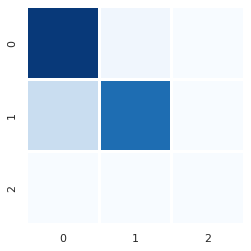

,model_name,type,metric_name,metric
0,SVC,Test_17x7,Accuracy_Score,0.9008
1,SVC,Test_17x7,F1_Score,0.7538
2,SVC,Test_17x7,Recall,0.7313
3,SVC,Test_17x7,Precision,0.7778
4,SVC,Test_17x7,Roc_Auc_Score,0.8383




Confusion matrix : 
 [[0.94520548 0.05479452 0.        ]
 [0.26865672 0.73134328 0.        ]
 [0.         0.         0.        ]]


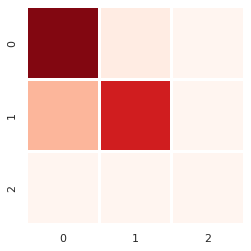

In [611]:
#Support Vector run
SVC_model, SVC_runtime = model_execution(SVC(), 'SVC')
train_pred_SVC = model_prediction(SVC_model, X_train)
test_pred_SVC  = model_prediction(SVC_model, X_test)

#Support Vector Evaluation
print("\n")
SVC_train = model_evaluation_classification(y_train, train_pred_SVC,'SVC', 'Train_17x7')
print("\n")
conf_matrix_classification(y_train, train_pred_SVC,'Blues')
print("\n")
SVC_test = model_evaluation_classification(y_test, test_pred_SVC, 'SVC', 'Test_17x7')
print("\n")
conf_matrix_classification(y_test, test_pred_SVC,'Reds')

###Logistic Regression

Logistic_Regression took 0.0293 seconds or 0.0005 minutes to run.




,model_name,type,metric_name,metric
0,LG,Train_17x7,Accuracy_Score,0.7711
1,LG,Train_17x7,F1_Score,0.0134
2,LG,Train_17x7,Recall,0.0068
3,LG,Train_17x7,Precision,0.2857
4,LG,Train_17x7,Roc_Auc_Score,0.5009




Confusion matrix : 
 [[0.99498244 0.00501756 0.        ]
 [0.99315068 0.00684932 0.        ]
 [0.         0.         0.        ]]


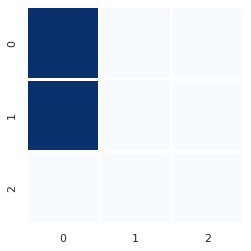

,model_name,type,metric_name,metric
0,LG,Test_17x7,Accuracy_Score,0.7938
1,LG,Test_17x7,F1_Score,0.0148
2,LG,Test_17x7,Recall,0.0075
3,LG,Test_17x7,Precision,1.0000
4,LG,Test_17x7,Roc_Auc_Score,0.5037




Confusion matrix : 
 [[1.         0.         0.        ]
 [0.99253731 0.00746269 0.        ]
 [0.         0.         0.        ]]


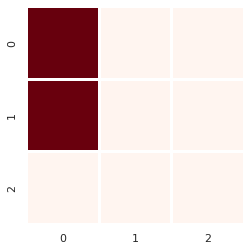

In [612]:
# Logistic Regression run 
lr_model, lr_runtime = model_execution(LogisticRegression(max_iter=400), 'Logistic_Regression')
train_pred_lr = model_prediction(lr_model, X_train)
test_pred_lr  = model_prediction(lr_model, X_test)

# Logistic Regression Evaluation
print("\n")
LG_train = model_evaluation_classification(y_train, train_pred_lr, 'LG', 'Train_17x7')
print("\n")
conf_matrix_classification(y_train, train_pred_lr,'Blues')

print("\n")
LG_test = model_evaluation_classification(y_test, test_pred_lr, 'LG', 'Test_17x7')
print("\n")
conf_matrix_classification(y_test, test_pred_lr,'Reds')

In [613]:
## merge the results in order to compare them
model_total = pd.concat([  
                           SVC_train    , SVC_test ,
                           LG_train     , LG_test  , 
                          ])

In [614]:
# for model comparisons
def model_plot_scores(df, metric, axis):

  grouped_df = model_total[model_total['metric_name'] == metric]

  sns.set_style("darkgrid")
  g = sns.barplot( data=grouped_df, hue='type', x='model_name', y='metric', ax=axis )
  g.set_ylabel(metric)
  g.set_title(f'{metric}')
  g.legend(loc=(0.7,1.15))

  return

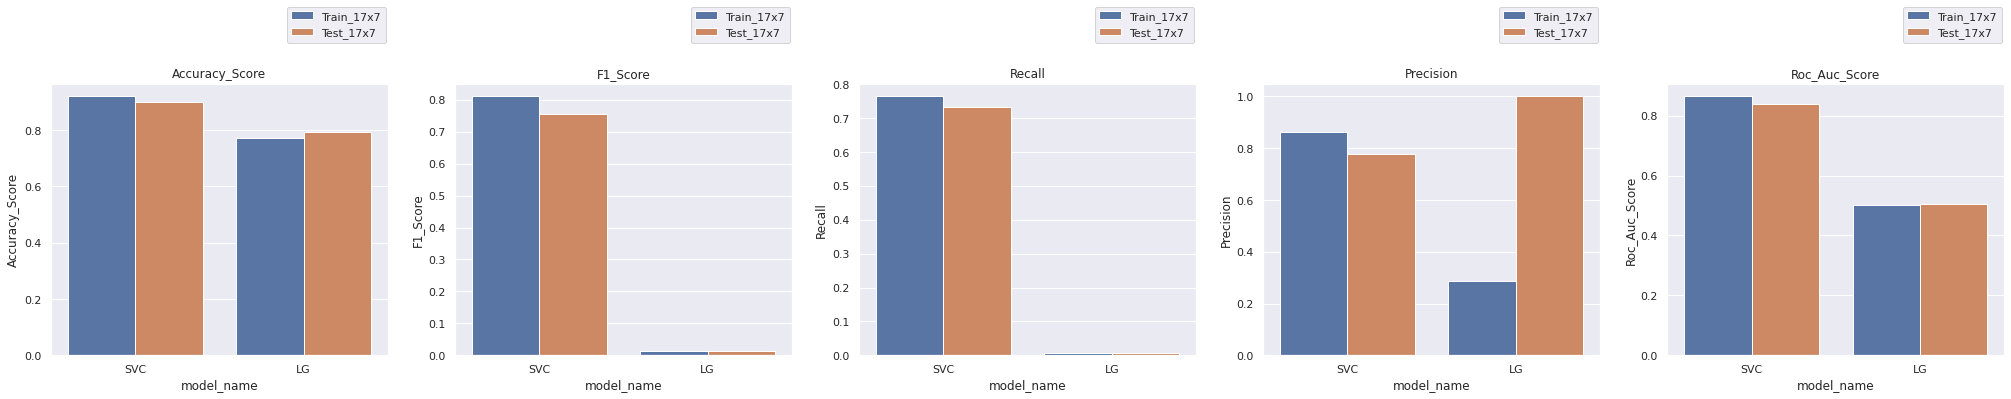

In [615]:
## Plot the scores of every method 
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(35,5))

model_plot_scores(model_total, 'Accuracy_Score'      , ax0)
model_plot_scores(model_total, 'F1_Score'            , ax1)
model_plot_scores(model_total, 'Recall'              , ax2)
model_plot_scores(model_total, 'Precision'           , ax3)
model_plot_scores(model_total, 'Roc_Auc_Score'       , ax4)

###As we see from abobe SVC is the best to have, Linear Classification does not work at all. Also no value exists for class 2 ( > 66.65 )

# Second run methods and fit them for 20x10 dataset

In [617]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(other_products_20x10, avgrevenue20x10, test_size=0.2, random_state=42)

### Support Vector Machine

SVC took 1.248 seconds or 0.0208 minutes to run.




,model_name,type,metric_name,metric
0,SVC,Train_20x10,Accuracy_Score,0.9428
1,SVC,Train_20x10,F1_Score,0.0267
2,SVC,Train_20x10,Recall,0.0135
3,SVC,Train_20x10,Precision,0.8571
4,SVC,Train_20x10,Roc_Auc_Score,0.5067




Confusion matrix : 
 [[9.99861265e-01 1.38734739e-04 0.00000000e+00]
 [9.86455982e-01 1.35440181e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


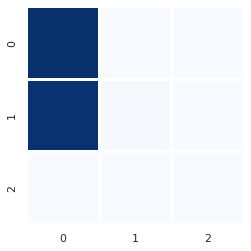

,model_name,type,metric_name,metric
0,SVC,Test_20x10,Accuracy_Score,0.9425
1,SVC,Test_20x10,F1_Score,0.0351
2,SVC,Test_20x10,Recall,0.0180
3,SVC,Test_20x10,Precision,0.6667
4,SVC,Test_20x10,Roc_Auc_Score,0.5087




Confusion matrix : 
 [[9.99445061e-01 5.54938957e-04 0.00000000e+00]
 [9.81981982e-01 1.80180180e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


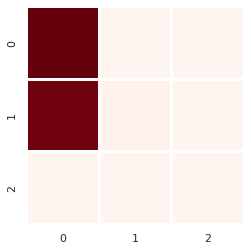

In [621]:
#Support Vector run
SVC_model_20x10, SVC_runtime_20x10 = model_execution(SVC(), 'SVC')
train_pred_SVC_20x10 = model_prediction(SVC_model_20x10, X_train)
test_pred_SVC_20x10  = model_prediction(SVC_model_20x10, X_test)

#Support Vector Evaluation
print("\n")
SVC_train_20x10 = model_evaluation_classification(y_train, train_pred_SVC_20x10,'SVC', 'Train_20x10')
print("\n")
conf_matrix_classification(y_train, train_pred_SVC_20x10,'Blues')
print("\n")
SVC_test_20x10 = model_evaluation_classification(y_test, test_pred_SVC_20x10, 'SVC', 'Test_20x10')
print("\n")
conf_matrix_classification(y_test, test_pred_SVC_20x10,'Reds')

###Logistic Regression

Logistic_Regression took 0.192 seconds or 0.0032 minutes to run.




,model_name,type,metric_name,metric
0,LG,Train_20x10,Accuracy_Score,0.9411
1,LG,Train_20x10,F1_Score,0.1601
2,LG,Train_20x10,Recall,0.0971
3,LG,Train_20x10,Precision,0.4574
4,LG,Train_20x10,Roc_Auc_Score,0.5450




Confusion matrix : 
 [[0.99292453 0.00707547 0.        ]
 [0.90293454 0.09706546 0.        ]
 [0.         0.         0.        ]]


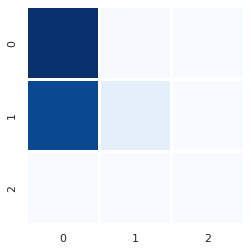

,model_name,type,metric_name,metric
0,LG,Test_20x10,Accuracy_Score,0.9394
1,LG,Test_20x10,F1_Score,0.1343
2,LG,Test_20x10,Recall,0.0811
3,LG,Test_20x10,Precision,0.3913
4,LG,Test_20x10,Roc_Auc_Score,0.5367




Confusion matrix : 
 [[0.99223085 0.00776915 0.        ]
 [0.91891892 0.08108108 0.        ]
 [0.         0.         0.        ]]


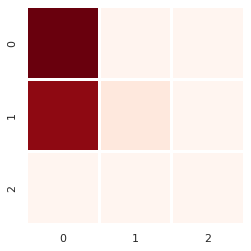

In [620]:
# Logistic Regression run 
lr_model_20x10, lr_runtime_20x10 = model_execution(LogisticRegression(max_iter=400), 'Logistic_Regression')
train_pred_lr_20x10 = model_prediction(lr_model_20x10, X_train)
test_pred_lr_20x10  = model_prediction(lr_model_20x10, X_test)

# Logistic Regression Evaluation
print("\n")
LG_train_20x10 = model_evaluation_classification(y_train, train_pred_lr_20x10, 'LG', 'Train_20x10')
print("\n")
conf_matrix_classification(y_train, train_pred_lr_20x10,'Blues')

print("\n")
LG_test_20x10 = model_evaluation_classification(y_test, test_pred_lr_20x10, 'LG', 'Test_20x10')
print("\n")
conf_matrix_classification(y_test, test_pred_lr_20x10,'Reds')

In [622]:
## merge the results in order to compare them
model_total = []
model_total = pd.concat([  
                           SVC_train_20x10    , SVC_test_20x10 ,
                           LG_train_20x10     , LG_test_20x10  , 
                          ])

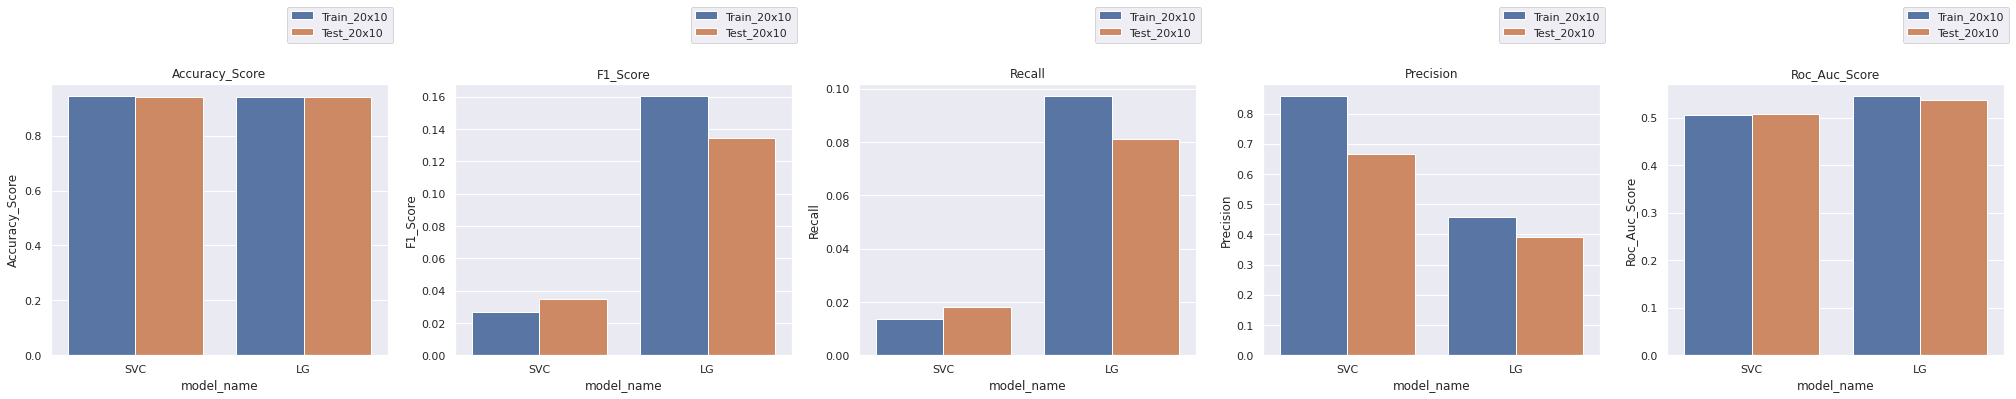

In [623]:
## Plot the scores of every method 
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(35,5))

model_plot_scores(model_total, 'Accuracy_Score'      , ax0)
model_plot_scores(model_total, 'F1_Score'            , ax1)
model_plot_scores(model_total, 'Recall'              , ax2)
model_plot_scores(model_total, 'Precision'           , ax3)
model_plot_scores(model_total, 'Roc_Auc_Score'       , ax4)

### As we see from above both are not so good and also no value exists for class 2 ( > 66.65 )